In [18]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')
import matplotlib.pyplot as plt
plt.style.use('default')

# X-Gate

In [3]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

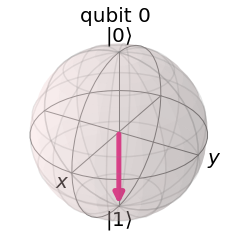

In [4]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

# Y,Z-Gate

In [10]:
qc = QuantumCircuit(1)
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐┌───┐
q: ┤ Y ├┤ Z ├
   └───┘└───┘

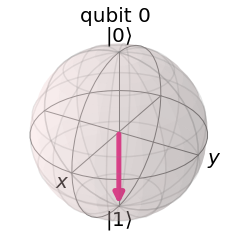

In [11]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

# Hadamard-Gate

In [13]:
qc = QuantumCircuit(1)
qc.h(0) # Do hadamar-gate on qubit 0
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

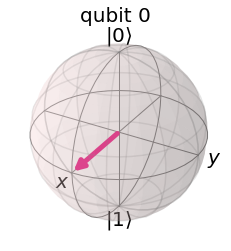

In [14]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

# Negative Y init state

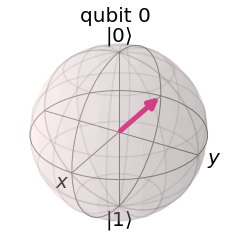

In [16]:
initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.draw()
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

# Measure in X basis

## Check state with out changes

In [28]:
initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
qc.measure(0, 0)
qc.draw()

┌──────────────────────────────┐┌─┐
  q: ┤ Initialize(0.70711,-0.70711) ├┤M├
     └──────────────────────────────┘└╥┘
c: 1/═════════════════════════════════╩═
                                      0

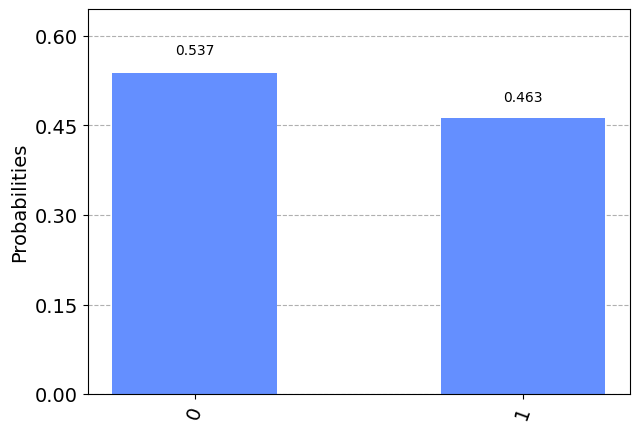

In [31]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

## Check state with basis change

In [15]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

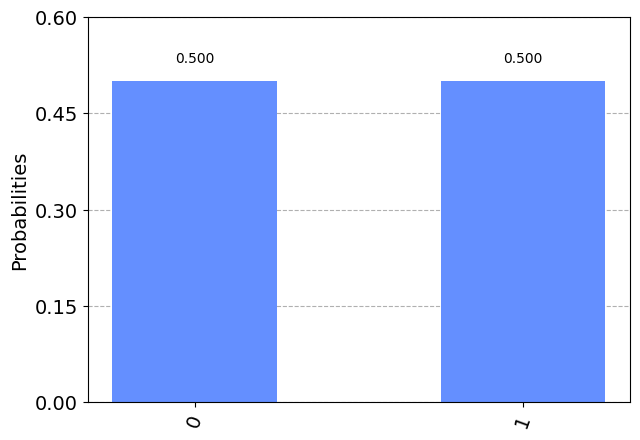

In [19]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

## Try same thing with anothe init state

In [35]:
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

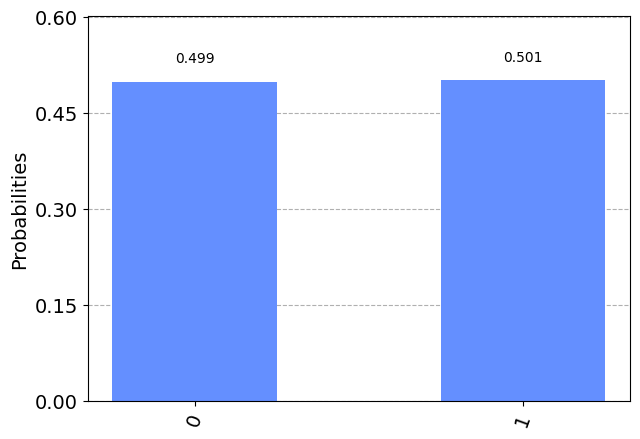

In [36]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

# P-Gate

In [37]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()

┌────────┐
q: ┤ P(π/4) ├
   └────────┘

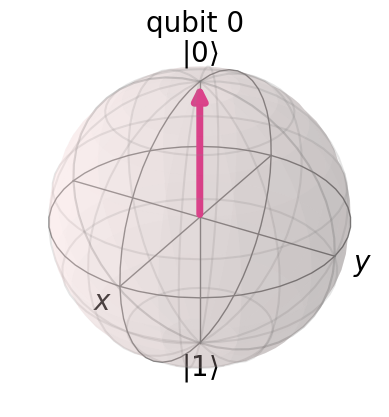

In [38]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [40]:
qc = QuantumCircuit(1)
qc.h(0)
qc.p(pi/4, 0)
qc.draw()

┌───┐┌────────┐
q: ┤ H ├┤ P(π/4) ├
   └───┘└────────┘

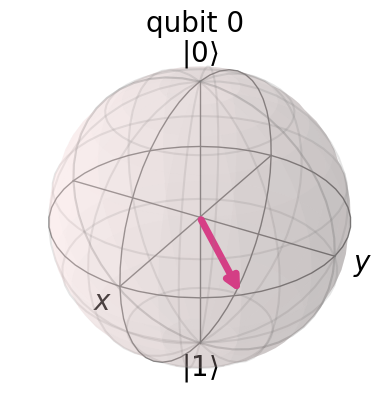

In [41]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)